In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

/Users/takahiro/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/takahiro/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


### 翌日の試合結果に関係がありそうな変数を探す

In [8]:
# 列ヘッダー名の設定
col_header = ('HV','Audience','Result','Rank','Savings','Hits','Home Runs','Stolen Bases','Strikeouts',
              'Hits Allowed','Home Runs Allowed','Runs Allowed','Earned Runs','K')

# csvファイルから取得する列番号のリスト
col_num = [6,7,8,9,10,18,19,20,21,22,23,24,25,26]

# データ取得が可能な年度のリスト
years = [2012,2013,2014,2015,2016,2017,2018]

teams = ['Bs','C','D','DB','E','F','G','H','L','M','S','T']

# 勝敗を数値（敗：0 勝：1）へ変換する関数
def match_result_classify(result):
    if result == '●':
        return 0
    elif result == '○':
        return 1

In [32]:
# 2012〜2018年の全チームの試合結果DataFrameを作成する関数
# 試合結果をずらす
def combine_next_match_results():
    df_all = pd.DataFrame(index=[],columns=[])
    
    for year in years:
        for team in teams:
            # csvファイルのデータをDataFrameへ格納
            df = pd.read_csv('csv/{y}/{y}_{t}_match_results.csv'.format(y=year,t=team),
                             sep=',',names=col_header,usecols=col_num)

            # 勝敗をずらす
            df['Next Result'] = df['Result'].shift(1)
            
            # 勝敗列の削除
            df = df.drop('Result',axis=1)
            
            # NaNと引き分けを除外
            for i in range(len(df)):
                if pd.isnull(df.loc[i,'Next Result']) or df.loc[i,'Next Result'] == '△':
                    df = df.drop(i)        
                    
            # 関数match_result_classifyを適用
            df['Next Result'] = df['Next Result'].apply(match_result_classify)

            df_all = pd.concat([df_all,df],ignore_index=True)
            
    return df_all

In [34]:
df_next = combine_next_match_results()
df_next.head(6)

,HV,Audience,Rank,Savings,Hits,Home Runs,Stolen Bases,Strikeouts,Hits Allowed,Home Runs Allowed,Runs Allowed,Earned Runs,K,Next Result
0,H,"24,274",6,-21,12,0,1,6,6,0,0,0,6,1
1,H,"18,719",6,-22,6,2,0,7,7,0,1,1,10,1
2,H,"13,829",6,-23,5,1,0,9,4,1,1,1,5,1
3,H,"10,226",6,-24,8,1,1,6,7,0,2,2,3,1
4,V,"28,709",6,-25,9,0,1,3,9,1,4,4,4,1
5,V,"10,348",6,-24,10,2,2,4,8,0,0,0,4,0


In [36]:
df_next.tail()

,HV,Audience,Rank,Savings,Hits,Home Runs,Stolen Bases,Strikeouts,Hits Allowed,Home Runs Allowed,Runs Allowed,Earned Runs,K,Next Result
11827,V,"28,312",3,1,8,0,0,12,3,0,0,0,13,0
11828,V,"27,935",4,0,8,0,0,5,4,0,1,1,3,1
11829,V,"45,993",4,-1,5,2,0,4,5,1,3,3,13,1
11830,V,"45,963",3,0,12,1,0,9,11,1,8,8,10,0
11831,V,"46,318",2,1,13,2,0,7,8,0,1,1,7,0


In [35]:
len(df_next)

11832

In [39]:
# 勝敗でグループ化して平均値を算出
df_next.groupby('Next Result').mean()

,Rank,Savings,Hits,Home Runs,Stolen Bases,Strikeouts,Hits Allowed,Home Runs Allowed,Runs Allowed,Earned Runs
Next Result,,,,,,,,,,
0,3.644459,-1.070501,8.484736,0.77551,0.575814,7.002867,8.576826,0.782425,3.985832,3.631641
1,3.408267,0.769100,8.556666,0.77503,0.574623,6.973065,8.461968,0.769947,3.889886,3.520752


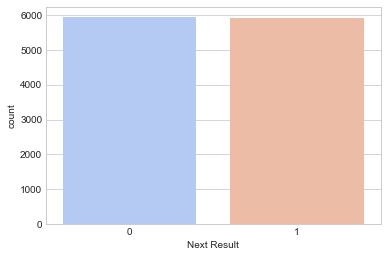

In [40]:
sns.countplot('Next Result',data=df_next,palette='coolwarm')

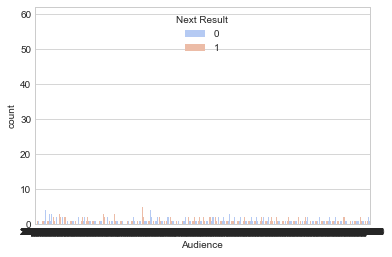

In [41]:
sns.countplot('Audience',data=df_next,hue='Next Result',palette='coolwarm')

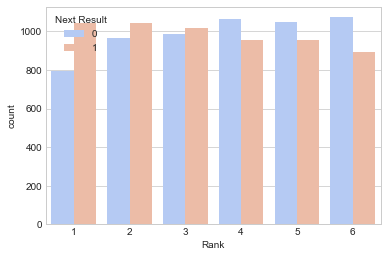

In [42]:
sns.countplot('Rank',data=df_next,hue='Next Result',palette='coolwarm')

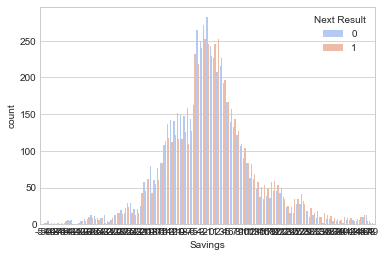

In [43]:
sns.countplot('Savings',data=df_next,hue='Next Result',palette='coolwarm')

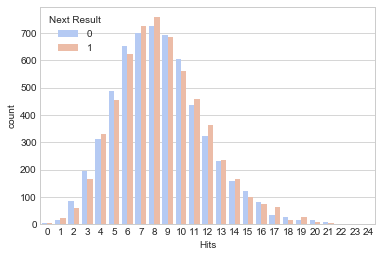

In [44]:
sns.countplot('Hits',data=df_next,hue='Next Result',palette='coolwarm')

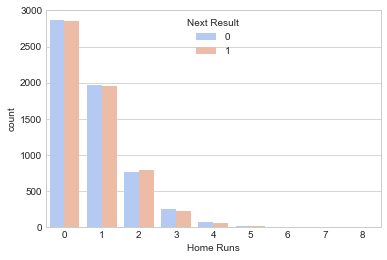

In [45]:
sns.countplot('Home Runs',data=df_next,hue='Next Result',palette='coolwarm')

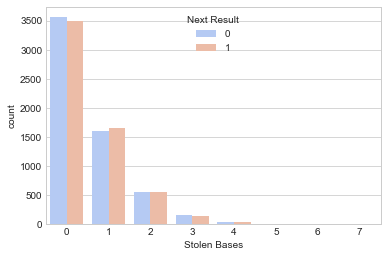

In [46]:
sns.countplot('Stolen Bases',data=df_next,hue='Next Result',palette='coolwarm')

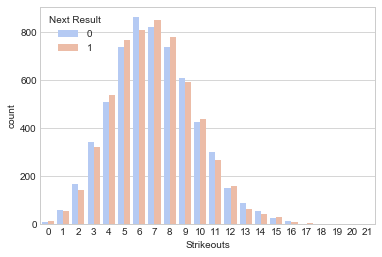

In [47]:
sns.countplot('Strikeouts',data=df_next,hue='Next Result',palette='coolwarm')

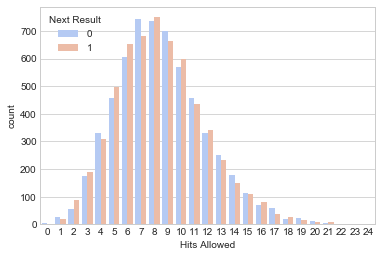

In [48]:
sns.countplot('Hits Allowed',data=df_next,hue='Next Result',palette='coolwarm')

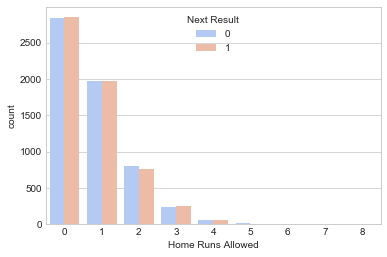

In [49]:
sns.countplot('Home Runs Allowed',data=df_next,hue='Next Result',palette='coolwarm')

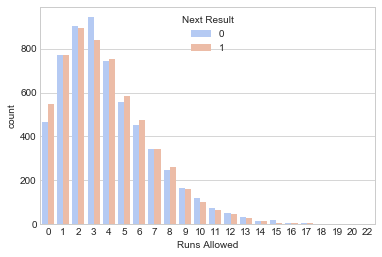

In [50]:
sns.countplot('Runs Allowed',data=df_next,hue='Next Result',palette='coolwarm')

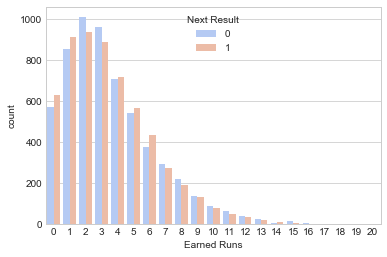

In [51]:
sns.countplot('Earned Runs',data=df_next,hue='Next Result',palette='coolwarm')

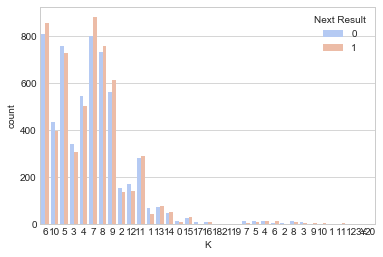

In [52]:
sns.countplot('K',data=df_next,hue='Next Result',palette='coolwarm')

## →このやり方では無理っぽい

## 一応モデルにつっこんでみる

In [54]:
# カテゴリーを表現する変数をダミー変数に展開
hv_dummies = pd.get_dummies(df_next['HV'])
hv_dummies.head()

,H,V
0,1,0
1,1,0
2,1,0
3,1,0
4,0,1


In [56]:
# 行数の確認
print(len(hv_dummies))
print(len(df_next))

11832
11832


In [59]:
X = df_next.drop(['HV','Next Result','Audience','K'],axis=1)

In [60]:
# ダミー変数を連結して説明変数のDataFrameを作成
X = pd.concat([X,hv_dummies], axis=1)

In [61]:
X.head()

,Rank,Savings,Hits,Home Runs,Stolen Bases,Strikeouts,Hits Allowed,Home Runs Allowed,Runs Allowed,Earned Runs,H,V
0,6,-21,12,0,1,6,6,0,0,0,1,0
1,6,-22,6,2,0,7,7,0,1,1,1,0
2,6,-23,5,1,0,9,4,1,1,1,1,0
3,6,-24,8,1,1,6,7,0,2,2,1,0
4,6,-25,9,0,1,3,9,1,4,4,0,1


In [65]:
# Yに目的変数を格納
Y = df_next['Next Result']
Y.head(6)

0    1
1    1
2    1
3    1
4    1
5    0
Name: Next Result, dtype: int64

In [66]:
# 目的変数をリストに変換
Y = Y.values
Y

array([1, 1, 1, ..., 1, 0, 0])

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
# 性能の評価用
from sklearn import metrics

/Users/takahiro/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [69]:
log_model = LogisticRegression()

# モデルの作成
log_model.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [70]:
# 変数名とその係数を格納するDataFrameを作成
coeff_df = DataFrame([X.columns, log_model.coef_[0]]).T
coeff_df

,0,1
0,Rank,-0.0471404
1,Savings,0.00540815
2,Hits,0.00762172
3,Home Runs,-0.0211442
4,Stolen Bases,-0.0202898
5,Strikeouts,0.00137498
6,Hits Allowed,-0.00662704
7,Home Runs Allowed,0.0105319
8,Runs Allowed,0.0356503
9,Earned Runs,-0.0420297


In [71]:
# データを学習用とテスト用に分割する
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [72]:
# 新しいモデルを作成
log_model2 = LogisticRegression()

In [73]:
# 学習用のデータだけでモデルを鍛える
log_model2.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [74]:
# テスト用データを使って予測
class_predict = log_model2.predict(X_test)
class_predict

array([1, 0, 1, ..., 0, 1, 1])

In [75]:
# 精度を計算
print(metrics.accuracy_score(Y_test, class_predict))

0.5314401622718052


<br>
<br>
<br>
<br>

## SVNにつっこんでみる

In [76]:
from sklearn.svm import SVC
model = SVC()

In [77]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=3) 

In [78]:
# 学習
model.fit(X_train,Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [79]:
predicted = model.predict(X_test)
expected = Y_test

print(metrics.accuracy_score(expected,predicted))

0.5632183908045977


<br>
<br>
## ↓↓↓Baseball LABの予想的中率とほぼ一緒や（2018/10/03時点）

<img src="baseball-lab.png">